<h1>Network of Reddit Users with Negative Sentiments (Covid19 Lockdown)</h1>

Objective: 
- To find out which author on Reddit is the most negative based its interaction with other authors (determined by the edge weight/frequency) in the coronavirus anti lockdown subreddit and possibly showcase some comments which have been posted by that author of interest

Findings:
- Most negative author: Johari82

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
reddit_sentiments = pd.read_csv('../Reddit_Sentiments/covid19_sentiments.csv')

In [3]:
reddit_sentiments

,Unnamed: 0,Unnamed: 0.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity,cluster,sentiment_polarity_summary
0,0,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Skooter_McGaven,i wish understand major new infect come is ove...,1,0.9274,2,positive
1,1,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Richandler,is overli famili spread i believ german heinsb...,0,0.4939,2,positive
2,2,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,NaN,thi sound horribl i hate littl thought i today...,0,-0.1531,1,neutral
3,3,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,lcbk,my husband i yet confirm we wait result but le...,0,-0.7579,0,negative
4,4,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,ZombiGrn,in neighborhood peopl start throw parti left r...,0,0.6124,2,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,McGloin_the_GOAT,thi econom analysi econom decis made margin me...,0,0.2960,2,positive
886,886,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,Zamaamiro,thi sub seem attract r lockdownskeptic poster ...,1,0.2732,1,neutral
887,887,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,NaN,i say true thi sub like commun hover around ce...,0,0.9607,2,positive
888,888,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,jphamlore,fortun anoth model ihm capabl make precis reco...,1,0.4939,2,positive


In [4]:
# Create new DataFrame for forming a network graph

user_networks = reddit_sentiments.filter(['author','commenter','comment'], axis=1)
user_networks['type'] = ['Undirected'] * user_networks.shape[0]
user_networks['weight'] = [1] * user_networks.shape[0]
user_networks

,author,commenter,comment,type,weight
0,Johari82,Skooter_McGaven,i wish understand major new infect come is ove...,Undirected,1
1,Johari82,Richandler,is overli famili spread i believ german heinsb...,Undirected,1
2,Johari82,NaN,thi sound horribl i hate littl thought i today...,Undirected,1
3,Johari82,lcbk,my husband i yet confirm we wait result but le...,Undirected,1
4,Johari82,ZombiGrn,in neighborhood peopl start throw parti left r...,Undirected,1
...,...,...,...,...,...
885,StudentjeNL,McGloin_the_GOAT,thi econom analysi econom decis made margin me...,Undirected,1
886,StudentjeNL,Zamaamiro,thi sub seem attract r lockdownskeptic poster ...,Undirected,1
887,StudentjeNL,NaN,i say true thi sub like commun hover around ce...,Undirected,1
888,StudentjeNL,jphamlore,fortun anoth model ihm capabl make precis reco...,Undirected,1


In [5]:
# Check for correctness

author = user_networks[user_networks['author'] == 'signed7']
author

,author,commenter,comment,type,weight


In [6]:
# Preview edge weight

edges = user_networks.groupby(['author','commenter']).agg({'weight':'sum'}).reset_index()
edges

,author,commenter,weight
0,FC37,AutoModerator,1
1,FC37,EmpathyFabrication,1
2,FC37,FC37,3
3,FC37,knitandpolish,1
4,FC37,renzpolster,1
...,...,...,...
537,zeaqqk,DURIAN8888,1
538,zeaqqk,WitnessNo8046,2
539,zeaqqk,armageddon_20xx,1
540,zeaqqk,pinganeto,1


In [7]:
# Sort DataFrame based on descending edge weight

edges.sort_values('weight', ascending=False).head()

,author,commenter,weight
76,Johari82,JenniferColeRhuk,16
475,p44v9n,NobodyKnowsYourName2,5
390,john_wb,JenniferColeRhuk,5
416,john_wb,statlaw,5
502,p44v9n,p44v9n,5


In [8]:
# Create a network graph

network = nx.from_pandas_edgelist(edges, 
                            source='author',
                            target='commenter',
                            edge_attr='weight' )

In [9]:
# Get network graph nodes (author) and edges (interaction) info

print(nx.info(network))

Graph with 484 nodes and 542 edges


<ipython-input-9-06ea12accad0>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(network))


In [10]:
# Get network graph degree per node

weighted_degrees = dict(nx.degree(network, weight='weight'))
# weighted_degrees
# print(sum(weighted_degrees.values()))
# print(len(weighted_degrees.values()))
avg_degree = sum(weighted_degrees.values()) / len(weighted_degrees.values())
avg_degree

2.727272727272727

In [11]:
subGraph = network.subgraph([n for n in weighted_degrees if weighted_degrees[n] > 2.35])

In [12]:
# Focus on sub network with a considerable high degree centrality

print(nx.info(subGraph))

Graph with 42 nodes and 87 edges


<ipython-input-12-f52f3a138b15>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(subGraph))


In [13]:
# Create subgraph's network 

pos = nx.spring_layout(network, weight='weight', iterations=20, k=4)

<ipython-input-14-ad9d40c2a99f>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


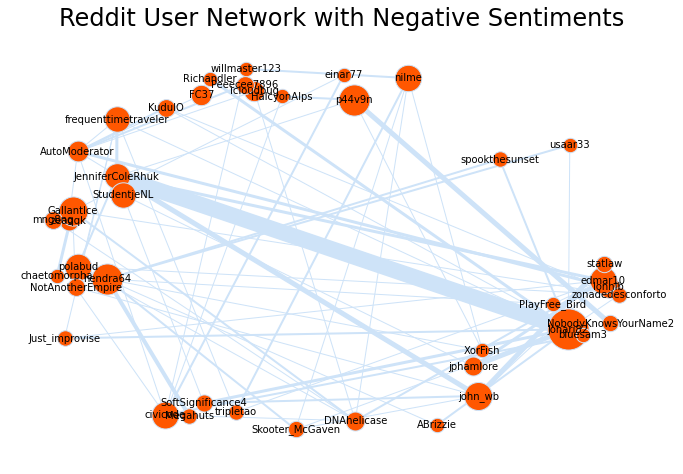

In [14]:
# Plot subgraph's network 

fig, ax = plt.subplots()
figsize = fig.get_size_inches()
plt.axis('off')
plt.title('Reddit User Network with Negative Sentiments', fontsize = 24)


for node in subGraph.nodes():
    size = 120*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subGraph, pos, nodelist=[node], node_size=size, node_color='#FF5700')
    ns.set_edgecolor('#CEE3F8')

nx.draw_networkx_labels(subGraph, pos, font_size=10)
   
for e in subGraph.edges(data=True):
    nx.draw_networkx_edges(subGraph, pos,[e], width=e[2]['weight'], edge_color='#CEE3F8')
     
fig.set_size_inches(figsize * 2)
fig.show()
plt.savefig('../Reddit_Output/Reddit_SNA_COVID19_Lockdown.png')

<ipython-input-15-752b97a2a399>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


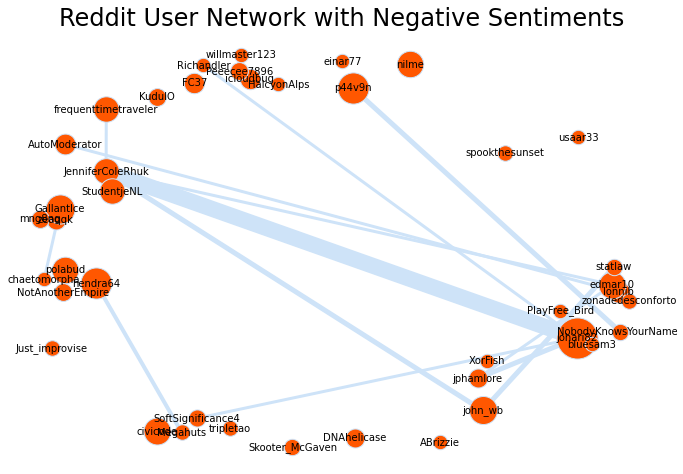

In [15]:
# Plot subgraph's network (with avg weighted)

fig, ax = plt.subplots()
figsize = fig.get_size_inches()
plt.axis('off')
plt.title('Reddit User Network with Negative Sentiments', fontsize = 24)


for node in subGraph.nodes():
    size = 120*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subGraph, pos, nodelist=[node], node_size=size, node_color='#FF5700')
    ns.set_edgecolor('#CEE3F8')

nx.draw_networkx_labels(subGraph, pos, {n:n.replace('-','\n') for n in subGraph.nodes() if weighted_degrees[n]>avg_degree},font_size=10);

for e in subGraph.edges(data=True):
    if e[2]['weight']>avg_degree:
        nx.draw_networkx_edges(subGraph, pos,[e], width=e[2]['weight'], edge_color='#CEE3F8')
        
fig.set_size_inches(figsize * 2)
fig.show()
plt.savefig('../Reddit_Output/Reddit_SNA_COVID19_Lockdown_Avg_Weighted.png')

In [16]:
# Most exchanged conversations
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
authors = reddit_sentiments[(reddit_sentiments['author'] == 'Johari82') & (reddit_sentiments['commenter'] == 'JenniferColeRhuk')]
for comment in authors['comment']:
    print(comment)
    print("===============================================================================================================================")

on behalf moder know exactli feel
your post remov broader econom impact diseas rule 8 these post better suit subreddit r coronaviru if believ made mistak pleas contact us thank keep r covid19 scienc covid 19
your post remov broader econom impact diseas rule 8 these post better suit subreddit r coronaviru if believ made mistak pleas contact us thank keep r covid19 scienc covid 19
post must link primari scientif sourc peer review origin research pre print establish server research report govern reput organis pleas also use scientif sourc comment appropri pleas flair post accordingli new stori secondari tertiari report origin research better fit r coronaviru
post must link primari scientif sourc peer review origin research pre print establish server research report govern reput organis pleas also use scientif sourc comment appropri pleas flair post accordingli new stori secondari tertiari report origin research better fit r coronaviru
your post comment contain sourc therefor may specul cl

In [17]:
# Node-level Statistics
# Normalize - Better for comparison between different networks

print("Number of nodes in subGraph: ", subGraph.number_of_nodes())
print("==========================================")
print("Number of edges in subGraph: ", subGraph.number_of_edges())
print("==========================================")
print("Nodes' Degree Centrality (Non-Normalized) in subGraph: ", nx.degree(subGraph))
print("==========================================")
print("Nodes' Degree Centrality (Normalized) in subGraph: ", nx.degree_centrality(subGraph))

Number of nodes in subGraph:  42
Number of edges in subGraph:  87
Nodes' Degree Centrality (Non-Normalized) in subGraph:  [('Just_improvise', 3), ('jphamlore', 3), ('JenniferColeRhuk', 6), ('XorFish', 3), ('Skooter_McGaven', 4), ('lonnib', 3), ('willmaster123', 2), ('spookthesunset', 2), ('chaetomorpha', 1), ('john_wb', 7), ('AutoModerator', 9), ('StudentjeNL', 4), ('edmar10', 9), ('civicode', 9), ('icloudbug', 2), ('zeaqqk', 3), ('SoftSignificance4', 3), ('GallantIce', 7), ('einar77', 2), ('nilme', 7), ('zonadedesconforto', 4), ('Megahuts', 1), ('statlaw', 1), ('tripletao', 3), ('Peeecee7896', 3), ('Richandler', 1), ('mng8ng', 1), ('DNAhelicase', 7), ('frequenttimetraveler', 8), ('PlayFree_Bird', 3), ('NobodyKnowsYourName2', 1), ('polabud', 7), ('Johari82', 12), ('ABrizzie', 2), ('usaar33', 2), ('HalcyonAlps', 2), ('bluesam3', 2), ('KuduIO', 3), ('hendra64', 8), ('NotAnotherEmpire', 5), ('p44v9n', 6), ('FC37', 3)]
Nodes' Degree Centrality (Normalized) in subGraph:  {'Just_improvise': 

In [18]:
# Node-level Statistics

print("Nodes' Closeness Centrality in subGraph: ", nx.closeness_centrality(subGraph))
print("==========================================")
print("Nodes' Eigenvector Centrality in subGraph: ", nx.eigenvector_centrality(subGraph))
print("==========================================")
print("Nodes' Betweenness Centrality (Normalized) in subGraph: ", nx.betweenness_centrality(subGraph, normalized=True))

Nodes' Closeness Centrality in subGraph:  {'Just_improvise': 0.37272727272727274, 'jphamlore': 0.3565217391304348, 'JenniferColeRhuk': 0.41836734693877553, 'XorFish': 0.3153846153846154, 'Skooter_McGaven': 0.41, 'lonnib': 0.30597014925373134, 'willmaster123': 0.3253968253968254, 'spookthesunset': 0.3360655737704918, 'chaetomorpha': 0.2662337662337662, 'john_wb': 0.4606741573033708, 'AutoModerator': 0.43617021276595747, 'StudentjeNL': 0.2827586206896552, 'edmar10': 0.44086021505376344, 'civicode': 0.4019607843137255, 'icloudbug': 0.35344827586206895, 'zeaqqk': 0.30597014925373134, 'SoftSignificance4': 0.36936936936936937, 'GallantIce': 0.35964912280701755, 'einar77': 0.3106060606060606, 'nilme': 0.37962962962962965, 'zonadedesconforto': 0.3942307692307692, 'Megahuts': 0.25153374233128833, 'statlaw': 0.3178294573643411, 'tripletao': 0.36936936936936937, 'Peeecee7896': 0.30597014925373134, 'Richandler': 0.3203125, 'mng8ng': 0.29927007299270075, 'DNAhelicase': 0.422680412371134, 'frequentt

In [19]:
# Network-level Statistics

print("Network Density in subGraph: ", nx.density(subGraph))
print("==========================================")
print("Network Diameter in subGraph: ", nx.diameter(subGraph))
print("==========================================")
print("Network Average path length in subGraph: ", nx.average_shortest_path_length(subGraph))

Network Density in subGraph:  0.10104529616724739
Network Diameter in subGraph:  6
Network Average path length in subGraph:  2.8919860627177703


In [20]:
# Network-level Statistics

num_max_reachable_other_nodes = subGraph.number_of_nodes() - 1

print("Total number of reachable other nodes: ", num_max_reachable_other_nodes)
node_list = list(subGraph.nodes)  # All nodes - we will iterate through this list, one node at a time

node_reachability_list = []
for node in node_list:
    # Retrieve 'descendants' or all reachable other nodes
    # nx.descendants returns a Set
    desc = nx.descendants(subGraph, node)
    
    # How many other nodes are reachable from this node?
    num_reachable_from_this_node = len(desc)
    node_reachability = num_reachable_from_this_node / num_max_reachable_other_nodes
    print("==========================================")
    print("Current node is", node, " and node-level reachability is", node_reachability)
    print(desc)
    node_reachability_list.append(node_reachability)
    
print("\n################ Network-level Reachability ################")
print( sum(node_reachability_list) / len(node_reachability_list) )

Total number of reachable other nodes:  41
Current node is Just_improvise  and node-level reachability is 1.0
{'jphamlore', 'JenniferColeRhuk', 'XorFish', 'Skooter_McGaven', 'lonnib', 'willmaster123', 'spookthesunset', 'chaetomorpha', 'john_wb', 'AutoModerator', 'StudentjeNL', 'edmar10', 'civicode', 'icloudbug', 'zeaqqk', 'SoftSignificance4', 'GallantIce', 'einar77', 'nilme', 'zonadedesconforto', 'Megahuts', 'statlaw', 'tripletao', 'Peeecee7896', 'Richandler', 'mng8ng', 'DNAhelicase', 'frequenttimetraveler', 'PlayFree_Bird', 'polabud', 'NobodyKnowsYourName2', 'Johari82', 'ABrizzie', 'usaar33', 'HalcyonAlps', 'bluesam3', 'KuduIO', 'hendra64', 'NotAnotherEmpire', 'p44v9n', 'FC37'}
Current node is jphamlore  and node-level reachability is 1.0
{'Just_improvise', 'JenniferColeRhuk', 'XorFish', 'Skooter_McGaven', 'lonnib', 'willmaster123', 'spookthesunset', 'chaetomorpha', 'john_wb', 'AutoModerator', 'StudentjeNL', 'edmar10', 'civicode', 'icloudbug', 'zeaqqk', 'SoftSignificance4', 'GallantIc